In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from xgboost import XGBClassifier 
import matplotlib.pyplot as plt

In [177]:
df=pd.read_csv(r'C:\Users\varad\OneDrive\Desktop\datasets\kaggle datasets\heart.csv')

In [178]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [179]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [180]:
data=df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

In [181]:
df_=df['HeartDisease']

In [182]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [183]:
categorical_features=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [184]:
df=pd.get_dummies(data,prefix=categorical_features,columns=categorical_features)

In [185]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [186]:
len(df.columns)

20

In [187]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [188]:
x_train,x_cv= train_test_split(df,test_size=0.2,random_state=True)

In [189]:
y_train,y_cv=train_test_split(df_,test_size=0.2,random_state=True)

In [190]:
y_train.head(),y_cv.head()

(852    1
 121    0
 664    1
 187    1
 108    0
 Name: HeartDisease, dtype: int64,
 900    1
 570    1
 791    1
 189    1
 372    1
 Name: HeartDisease, dtype: int64)

# DecisionTreeClassifier

In [191]:
min_sample_split=[2,10, 30, 50, 100, 200, 300, 700]
max_depth=[1,2, 3, 4, 8, 16, 32, 64, None]

Min_Sample_Split based

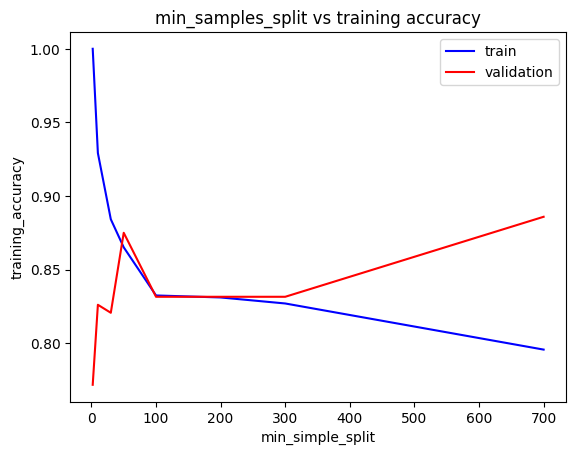

In [192]:
training_accuracy=[]
val_accuracy=[]
for s in min_sample_split:
    model= DecisionTreeClassifier(min_samples_split=s,random_state=True)
    model.fit(x_train,y_train)
    predict_train=model.predict(x_train)
    predict_val=model.predict(x_cv)
    training_accuracy.append(accuracy_score(predict_train,y_train))
    val_accuracy.append(accuracy_score(predict_val,y_cv))

plt.plot(min_sample_split,training_accuracy,c='b')
plt.plot(min_sample_split,val_accuracy,c='r')
plt.xlabel('min_simple_split')
plt.ylabel('training_accuracy')
plt.title('min_samples_split vs training accuracy')
plt.legend(['train','validation'])

max_depth based

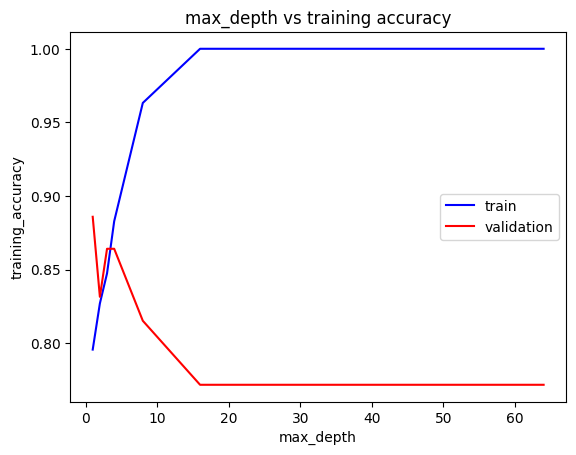

In [193]:
training_accuracy=[]
val_accuracy=[]
for s in max_depth:
    model= DecisionTreeClassifier(max_depth=s,random_state=True)
    model.fit(x_train,y_train)
    predict_train=model.predict(x_train)
    predict_val=model.predict(x_cv)
    training_accuracy.append(accuracy_score(predict_train,y_train))
    val_accuracy.append(accuracy_score(predict_val,y_cv))

plt.plot(max_depth,training_accuracy,c='b')
plt.plot(max_depth,val_accuracy,c='r')
plt.xlabel('max_depth')
plt.ylabel('training_accuracy')
plt.title('max_depth vs training accuracy')
plt.legend(['train','validation'])

# RandomForestClassifier

In [194]:
min_sample_split=[2,10, 30, 50, 100, 200, 300, 700]
max_depth=[1,2, 3, 4, 8, 16, 32, 64, None]

Min_Sample_Split based

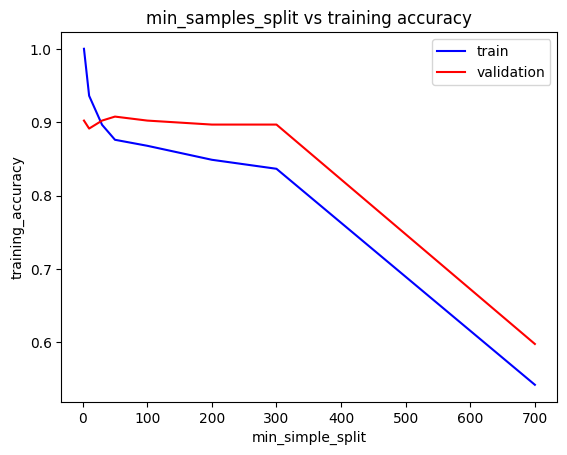

In [195]:
training_accuracy=[]
val_accuracy=[]
for s in min_sample_split:
    model= RandomForestClassifier(n_estimators=100,max_features='sqrt',min_samples_split=s,random_state=True)
    model.fit(x_train,y_train)
    predict_train=model.predict(x_train)
    predict_val=model.predict(x_cv)
    training_accuracy.append(accuracy_score(predict_train,y_train))
    val_accuracy.append(accuracy_score(predict_val,y_cv))

plt.plot(min_sample_split,training_accuracy,c='b')
plt.plot(min_sample_split,val_accuracy,c='r')
plt.xlabel('min_simple_split')
plt.ylabel('training_accuracy')
plt.title('min_samples_split vs training accuracy')
plt.legend(['train','validation'])

Max_depth

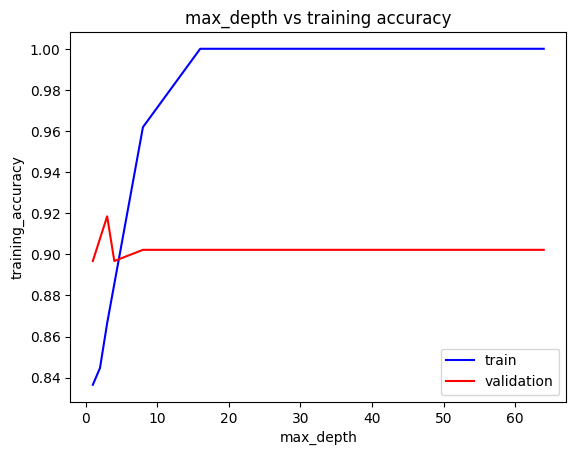

In [196]:
training_accuracy=[]
val_accuracy=[]
for s in max_depth:
    model= RandomForestClassifier(max_depth=s,random_state=True)
    model.fit(x_train,y_train)
    predict_train=model.predict(x_train)
    predict_val=model.predict(x_cv)
    training_accuracy.append(accuracy_score(predict_train,y_train))
    val_accuracy.append(accuracy_score(predict_val,y_cv))

plt.plot(max_depth,training_accuracy,c='b')
plt.plot(max_depth,val_accuracy,c='r')
plt.xlabel('max_depth')
plt.ylabel('training_accuracy')
plt.title('max_depth vs training accuracy')
plt.legend(['train','validation'])

# XGBoost

In [197]:
min_sample_split=[2,10, 30, 50, 100, 200, 300, 700]
max_depth=[1,2, 3, 4, 8, 16, 32, 64, None]

In [198]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = True)

In [201]:
n = int(len(x_train)*0.8)
xgb_model.fit(x_train,y_train, eval_set = [(x_cv,y_cv)],early_stopping_rounds = 10,verbose=True)

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'